In [54]:
import pandas as pd

import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [55]:
df =pd.read_csv('/home/aman/Desktop/datascience/dataset/Product_Reviews (1).csv')

In [56]:

df=df.drop(columns='Product ID')
df

,Product Review,Sentiment
0,I initially had trouble deciding between the p...,POSITIVE
1,Allow me to preface this with a little history...,POSITIVE
2,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,I bought one of the first Paperwhites and have...,POSITIVE
4,I have to say upfront - I don't like coroporat...,POSITIVE
...,...,...
1002,This is not the same remote that I got for my ...,NEUTRAL
1003,I have had to change the batteries in this rem...,NEGATIVE
1004,"Remote did not activate, nor did it connect to...",NEGATIVE
1005,It does the job but is super over priced. I fe...,NEUTRAL


In [57]:
df=df.drop_duplicates()

In [58]:
df.isnull().sum()


Product Review    0
Sentiment         0
dtype: int64

In [59]:
df.shape

(908, 2)

<Axes: xlabel='Sentiment', ylabel='count'>

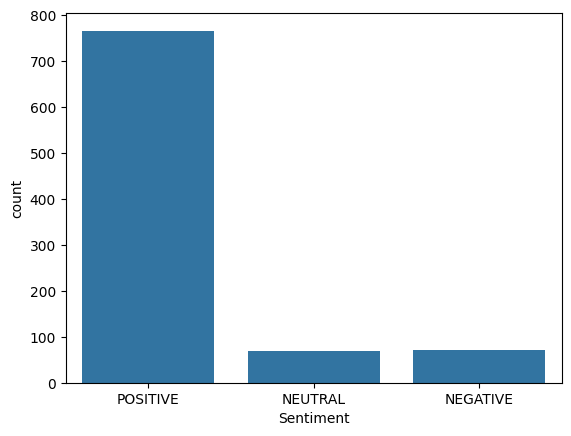

In [60]:
sns.countplot(x='Sentiment', data=df)

In [61]:
#preprocess 
def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text

df['Product Review'] = df['Product Review'].apply(clean_text)
df['Sentiment'] = df['Sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})
df


/tmp/ipykernel_18722/2798683737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product Review'] = df['Product Review'].apply(clean_text)
/tmp/ipykernel_18722/2798683737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})


,Product Review,Sentiment
0,i initially had trouble deciding between the p...,1.0
1,allow me to preface this with a little history...,1.0
2,i am enjoying it so far great for reading had ...,1.0
3,i bought one of the first paperwhites and have...,1.0
4,i have to say upfront i dont like coroporate ...,1.0
...,...,...
1002,this is not the same remote that i got for my ...,NaN
1003,i have had to change the batteries in this rem...,0.0
1004,remote did not activate nor did it connect to ...,0.0
1005,it does the job but is super over priced i fee...,NaN


In [62]:
# Step 3: Tokenization & Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Product Review'])
sequences = tokenizer.texts_to_sequences(df['Product Review'])

max_len = 200
X = pad_sequences(sequences, maxlen=max_len)
y = df['Sentiment'].values

In [63]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Step 5: Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/aman/Desktop/datascience/env/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Step 6: Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 7: Evaluate on Test Set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.2180 - loss: nan - val_accuracy: 0.0822 - val_loss: nan
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.0794 - loss: nan - val_accuracy: 0.0822 - val_loss: nan
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0897 - loss: nan - val_accuracy: 0.0822 - val_loss: nan
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.0944 - loss: nan - val_accuracy: 0.0822 - val_loss: nan
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0743 - loss: nan - val_accuracy: 0.0822 - val_loss: nan
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0713 - loss: nan

Test Accuracy: 0.0714
